In [41]:
#Importa biblioteca
from skimage import io
import os
from skimage import color
from skimage import filters
#Leitura de assinatura
diretorio='./data/original/'
nomeArquivo='10.jpg'
filename = os.path.join(diretorio+nomeArquivo)
image = io.imread(filename)
#Conversão tom de cinza
img_gray = color.rgb2gray(image)


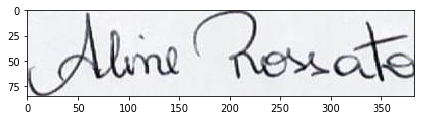

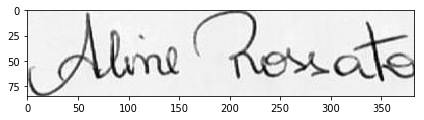

In [42]:
#plotar imagem original
io.imshow(image)
io.show()
#plotar imagem tom de cinza
io.imshow(img_gray)
io.show()

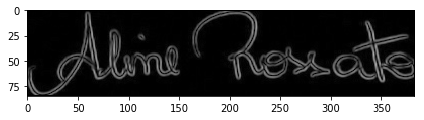

In [43]:
# ... or any other NumPy array!
edges = filters.sobel(img_gray)
io.imshow(edges)
io.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


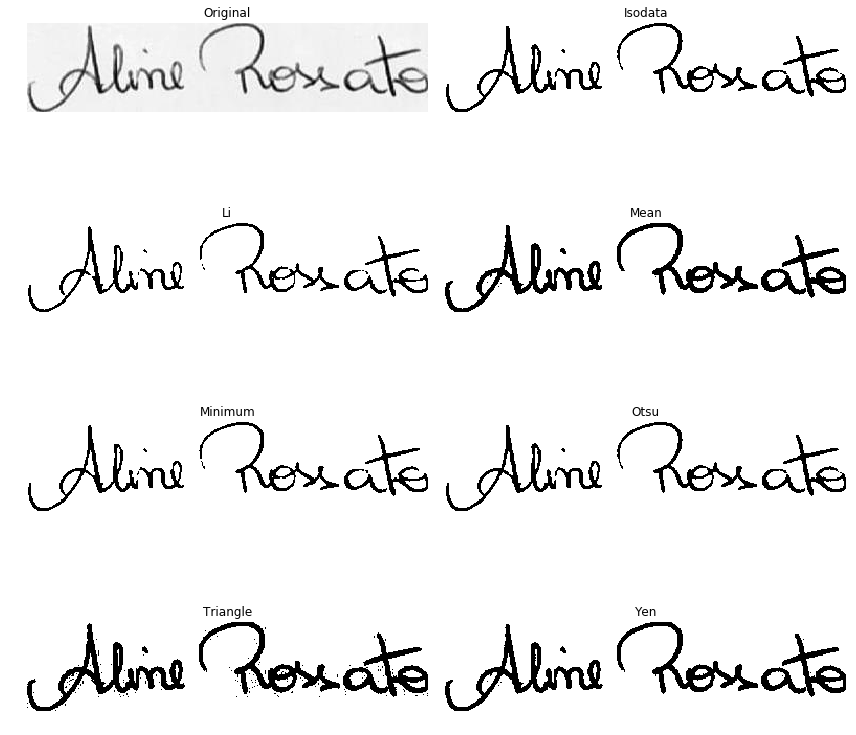

In [44]:
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(img_gray, figsize=(12, 12), verbose=True)
plt.show()

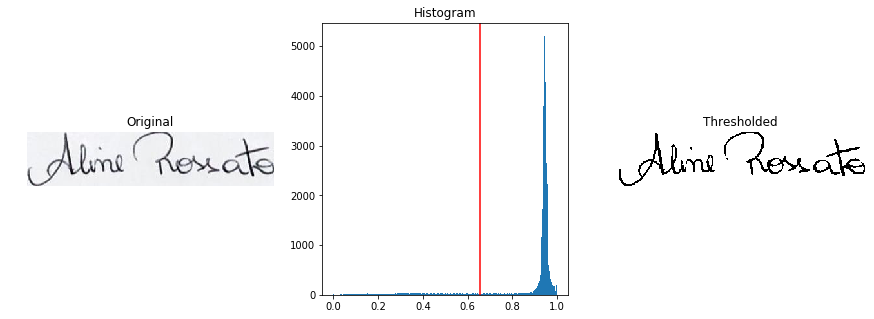

In [45]:
from skimage.filters import threshold_otsu,threshold_yen
import numpy as np

thresh = threshold_otsu(img_gray)
thresh_yen = threshold_yen(img_gray)
#binary = (img_gray > thresh)
#binary=np.where(img_gray<=(thresh*1.3),(img_gray*0.7),1)
binary=np.where(img_gray<=(thresh),0,255)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

Imagem binarizada


C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


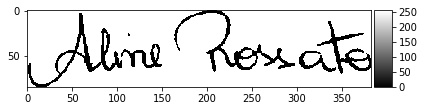

Imagem binarizada


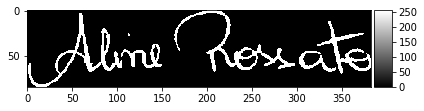

Imagem dilatada


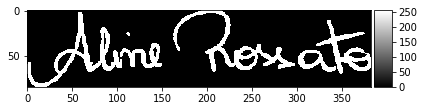

Imagem invertida


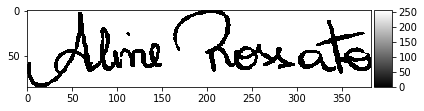

Filtro de media, para remoção de ruído


C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:190: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


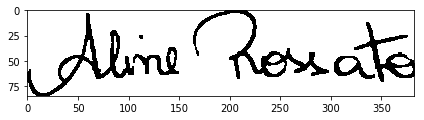

In [46]:
from skimage.morphology import dilation
from skimage.morphology import square

binary_iv=np.where(binary<=0.5,255,0)

img_dil=dilation(binary_iv, square(2))

print("Imagem binarizada")
io.imshow(binary, cmap=plt.cm.gray)
io.show()
print("Imagem binarizada")
io.imshow(binary_iv, cmap=plt.cm.gray)
io.show()
print("Imagem dilatada")
io.imshow(img_dil, cmap=plt.cm.gray)
io.show()
print("Imagem invertida")
img_dil_iv=np.where(img_dil>0.5,0,255)
io.imshow(img_dil_iv, cmap=plt.cm.gray)
io.show()
print("Filtro de media, para remoção de ruído")
img_dil_med=filters.median(img_dil_iv, np.ones((2, 2)))
io.imshow(img_dil_med, cmap=plt.cm.gray)
io.show()



binary yen filter


C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:190: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


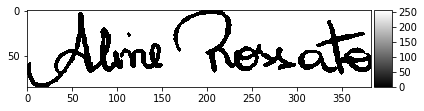

In [47]:

binary_yen=np.where(img_gray<=(thresh_yen),0,255)
binary_iv_yen=np.where(binary<=0.5,255,0)
img_dil_yen=dilation(binary_iv_yen, square(2))
print("binary yen filter")
img_dil_med_yen=filters.median(img_dil_yen, np.ones((2, 2)))
img_dil_med_yen=np.where(img_dil_med_yen>0.5,0,255)
io.imshow(img_dil_med_yen, cmap=plt.cm.gray)
io.show()



In [48]:
from skimage import img_as_uint
diretorioSaidaMod1='./data/ready/Mod1/'
diretorioSaidaMod2='./data/ready/Mod2/'
diretorioSaidaMod3='./data/ready/Mod3/'
filenameout = os.path.join(diretorioSaidaMod1+nomeArquivo)
io.imsave(filenameout,img_dil_med_yen)
filenameout = os.path.join(diretorioSaidaMod2+nomeArquivo)
io.imsave(filenameout,binary)
filenameout = os.path.join(diretorioSaidaMod3+nomeArquivo)
io.imsave(filenameout,img_dil_med)

C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/ready/Mod1/10.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:190: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
C:\Users\wlsantos\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/ready/Mod2/10.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
